In [17]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [9]:
train = pd.read_csv('./funda_train.csv')
print(train.shape)
train.head()

(6556613, 9)


,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


In [62]:
train['year'] = train['transacted_date'].apply(lambda x : x.split('-')[0]).apply(int)
train['month'] = train['transacted_date'].apply(lambda x : x.split('-')[1]).apply(int)
train['day'] = train['transacted_date'].apply(lambda x : x.split('-')[2]).apply(int)

train['hour'] = train['transacted_time'].apply(lambda x : x.split(':')[0]).apply(int)
train['minute'] = train['transacted_time'].apply(lambda x : x.split(':')[1]).apply(int)

train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,year,month,day,hour,minute
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857,2016,6,1,13,13
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857,2016,6,1,18,12
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000,2016,6,1,18,52
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857,2016,6,1,20,22
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000,2016,6,2,11,6


# submission file

In [4]:
sub = pd.read_csv('./submission.csv')
print(sub.shape)
sub.head()

(1967, 2)


,store_id,amount
0,0,0
1,1,0
2,2,0
3,4,0
4,5,0


In [5]:
print(sub.shape)
print(len(sub.store_id.unique()))

(1967, 2)
1967


In [22]:
print('train data의 모든 store_id와 동일하다') if set(sub.store_id) - set(train.store_id) == set() else print('nope')

train data의 모든 store_id와 동일하다


# target value

In [26]:
target_stat = train.groupby('store_id')['amount'].agg(['sum','var','nunique', 'mean','count'])
target_stat.head()

,sum,var,nunique,mean,count
store_id,,,,,
0,2.417447e+07,2.884415e+07,110,5394.883157,4481
1,3.668643e+06,1.962944e+05,48,970.027196,3782
2,8.843000e+06,1.454211e+08,84,15142.123288,584
4,2.990096e+07,1.428485e+07,232,5128.809115,5830
5,1.086164e+07,2.469484e+07,204,5547.315045,1958


In [52]:
sub1 = sub.copy()
sub1 = sub1.set_index('store_id')
sub1['amount'] = target_stat['mean']
#sub1.to_csv('./sub/20190801_target_mean.csv') #- 3175040.514030

In [56]:
print(sub.shape)
print(sub1.shape)

(1967, 2)
(1967, 1)


In [39]:
#store_id별 거래가 있었던 날짜 수
date_count = train.groupby(['store_id'])['transacted_date'].nunique().to_frame()
date_count.columns = ['date_count']

date_count.head()

,date_count
store_id,
0,803
1,673
2,276
4,893
5,661


In [40]:
print(target_stat.shape)
print(date_count.shape)

(1967, 5)
(1967, 1)


In [41]:
date_count['sum'] = target_stat['sum']
date_count['amount'] = date_count['sum'] / date_count['date_count'] * 92
date_count.head()

,date_count,sum,amount
store_id,,,
0,803,2.417447e+07,2.769678e+06
1,673,3.668643e+06,5.015084e+05
2,276,8.843000e+06,2.947667e+06
4,893,2.990096e+07,3.080502e+06
5,661,1.086164e+07,1.511757e+06


In [60]:
#amount의 합을 거래가 있었던 날짜 수로 나누고, 우리가 예측해야하는 3달인 92를 곱한 간단한 계산
#date_count[['amount']].to_csv('./sub/20190801_divided_by_date_count.csv') - 2,149,999.12868

# NA

In [61]:
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,year,month,day,hour,minute
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857,2016,6,1,13,13
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857,2016,6,1,18,12
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000,2016,6,1,18,52
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857,2016,6,1,20,22
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000,2016,6,2,11,6


In [63]:
train.isnull().sum()

store_id                  0
card_id                   0
card_company              0
transacted_date           0
transacted_time           0
installment_term          0
region              2042766
type_of_business    3952609
amount                    0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

In [72]:
import missingno as msno
import matplotlib.pyplot as plt

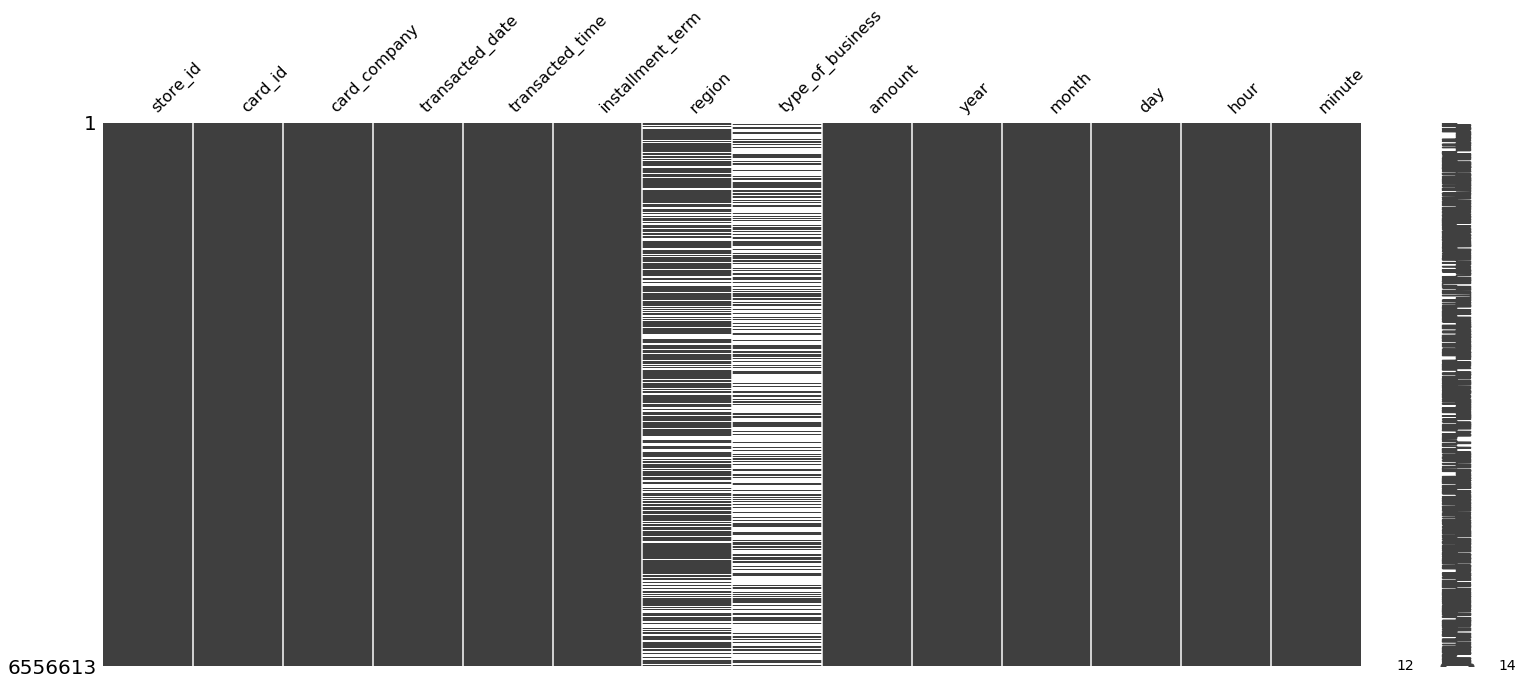

In [73]:
msno.matrix(train)
plt.show()

region 0.31155811697289437%
type of business 0.6028431142725672%


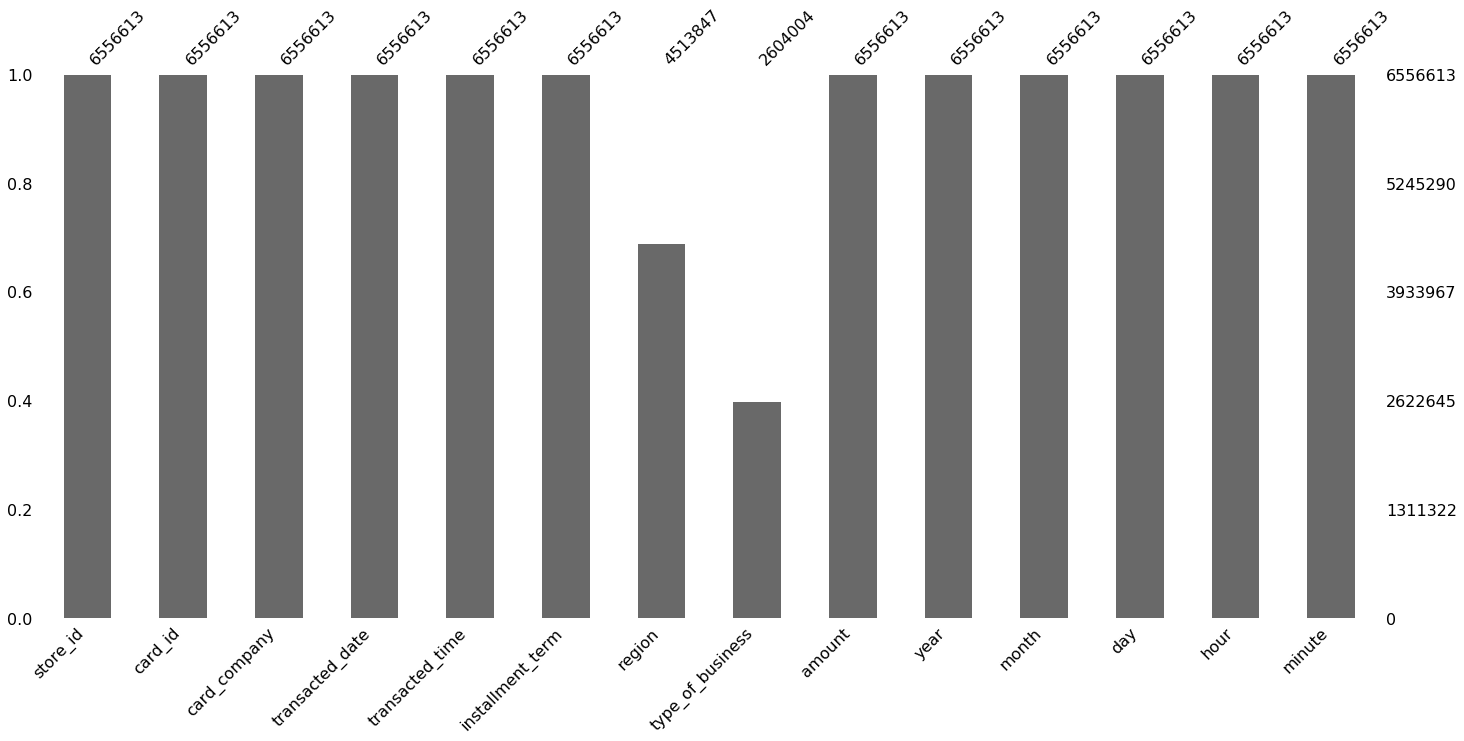

In [75]:
print('region {}%'.format(train.region.isnull().sum() / len(train)))
print('type of business {}%'.format(train.type_of_business.isnull().sum() / len(train)))

msno.bar(train)
plt.show()

## region
- region은 store_id의 지역!
- 같은 store_id라면 같은 region!
- store_id를 기준으로 보았을 때, 690개의 store가 region이 없음

In [116]:
region_NA = train.loc[train.region.isnull(), 'store_id'].unique()
print('region NA인 store_id의 개수 : ', len(region_NA))
print('region NA인 store_id의 비율 : ', len(region_NA) / len(train.store_id.unique()))

region NA인 store_id의 개수 :  690
region NA인 store_id의 비율 :  0.35078800203355365


## type of business
- type of business은 store_id의 업종!
- 같은 store_id라면 같은 type of business!
- store_id를 기준으로 보았을 때, 1175개의 store가 type of business이 없음

In [117]:
business_NA = train.loc[train.type_of_business.isnull(), 'store_id'].unique()
print('type_of_business NA인 store_id의 개수 : ', len(business_NA))
print('type_of_business NA인 store_id의 비율 : ', len(business_NA) / len(train.store_id.unique()))

type_of_business NA인 store_id의 개수 :  1175
type_of_business NA인 store_id의 비율 :  0.5973563802745298


## both

In [118]:
print('type_of_business & region NA인 store_id의 개수 : ', len(set(region_NA).intersection(set(business_NA))))
print('type_of_business & region NA인 store_id의  비율 : ', len(set(region_NA).intersection(set(business_NA))) / len(train.store_id.unique()))

type_of_business & region NA인 store_id의 개수 :  600
type_of_business & region NA인 store_id의  비율 :  0.3050330452465684


In [120]:
print('region만 NA인 개수 : ', len(set(region_NA) - set(business_NA)))
print('type of business만 NA인 개수 : ', len(set(business_NA) - set(region_NA)))

region만 NA인 개수 :  90
type of business만 NA인 개수 :  575
